In [24]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [25]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_maze

maze = gym.make('Maze5-v0')
print("This is how maze looks like")
situation = maze.reset()
print(type(situation))
print(situation)
maze.render()


This is how maze looks like
<class 'tuple'>
('0', '1', '1', '0', '0', '1', '1', '1')

■ ■ ■ ■ ■ ■ ■ ■ ■
■ □ □ □ □ □ □ $ ■
■ □ □ ■ □ ■ ■ □ ■
■ □ ■ □ □ □ □ □ ■
■ □ □ □ ■ ■ □ □ ■
■ □ ■ □ ■ □ □ ■ ■
■ A ■ □ □ ■ □ □ ■
■ □ □ □ □ □ ■ □ ■
■ ■ ■ ■ ■ ■ ■ ■ ■


In [26]:
from lcs.agents.xcs import XCS
from lcs.agents.xcs import Configuration as XCSConfig
from lcs.agents.xncs import XNCS
from lcs.agents.xncs import Configuration as XNCSConfig

from utils.xcs_utils import xcs_metrics
from utils.nxcs_utils import xncs_metrics

XCScfg = XCSConfig(number_of_actions=8,
                    max_population=1600,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.01,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=1,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xcs_metrics)

XNCScfg = XNCSConfig(number_of_actions=8,
                    max_population=1600,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.01,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=1,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0.1,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xncs_metrics,
                    lmc=10,
                    lem=100)


In [27]:
from utils.xcs_utils import avg_experiment as XCSExp
from utils.nxcs_utils import avg_experiment as XNCSExp

number_of_experiments = 3
explore = 2000
exploit = 500

df = XCSExp(maze=maze,
             cfg=XCScfg,
             number_of_tests=number_of_experiments,
             explore_trials=0, # explore,
             exploit_trials=exploit + explore,
             pre_generate=True
           )

df_other = XNCSExp(
    maze=maze,
    cfg=XNCScfg,
    number_of_tests=number_of_experiments,
    explore_trials=0,
    exploit_trials=exploit + explore,
    pre_generate=True
    )

Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 100, 'reward': 0.0, 'perf_time': 1.2148428000000422, 'population': 1493, 'numerosity': 1600, 'average_specificity': 8.454375}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 53, 'reward': 1000.0000134443242, 'perf_time': 0.3629083999994691, 'population': 1025, 'numerosity': 1600, 'average_specificity': 6.698125}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 6, 'reward': 1161.424071019343, 'perf_time': 0.025629000000662927, 'population': 877, 'numerosity': 1600, 'average_specificity': 6.15375}
INFO:lcs.agents.Agent:{'trial': 700, 'steps_in_trial': 14, 'reward': 1008.272121069557, 'perf_time': 0.10065940000004048, 'population': 865, 'numerosity': 1600, 'average_specificity': 6.2}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_trial': 1, 'reward': 1813.439067114496, 'perf_time': 0.00946029999977327, 'population': 776, 'numerosity': 1600, 'average_specificity': 6.3775}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_in_tria

Executing 1 experiment


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 100, 'reward': 0.0, 'perf_time': 1.4196991999997408, 'population': 1478, 'numerosity': 1600, 'average_specificity': 8.558125}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 4, 'reward': 1292.5486346773926, 'perf_time': 0.032083199999760836, 'population': 1127, 'numerosity': 1600, 'average_specificity': 6.593125}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 5, 'reward': 1254.607130792708, 'perf_time': 0.026006399999459973, 'population': 997, 'numerosity': 1600, 'average_specificity': 5.870625}
INFO:lcs.agents.Agent:{'trial': 700, 'steps_in_trial': 2, 'reward': 1528.3204741405737, 'perf_time': 0.017026500000611122, 'population': 984, 'numerosity': 1600, 'average_specificity': 5.885}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_trial': 3, 'reward': 1357.911, 'perf_time': 0.021292800000082934, 'population': 856, 'numerosity': 1600, 'average_specificity': 6.131875}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_in_trial

Executing 2 experiment


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 100, 'reward': 0.0, 'perf_time': 1.3828118000001268, 'population': 1502, 'numerosity': 1600, 'average_specificity': 8.4875}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 5, 'reward': 1180.8595489641245, 'perf_time': 0.035847399999511254, 'population': 1076, 'numerosity': 1600, 'average_specificity': 7.193125}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 5, 'reward': 1209.4188195668637, 'perf_time': 0.025146299999505572, 'population': 939, 'numerosity': 1600, 'average_specificity': 6.8675}
INFO:lcs.agents.Agent:{'trial': 700, 'steps_in_trial': 100, 'reward': 2.385089144282035e-42, 'perf_time': 0.58384340000066, 'population': 847, 'numerosity': 1600, 'average_specificity': 7.4625}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_trial': 77, 'reward': 1000.0000000035228, 'perf_time': 0.3360059000006004, 'population': 748, 'numerosity': 1600, 'average_specificity': 5.881875}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_

Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 100, 'reward': 0.0, 'perf_time': 1.5664572000005137, 'numerosity': 1600, 'population': 1508, 'average_specificity': 8.804375, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 71, 'reward': 1000.0000000275006, 'perf_time': 0.6064367999997557, 'numerosity': 1600, 'population': 1116, 'average_specificity': 6.816875, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 7, 'reward': 1109.6747227223457, 'perf_time': 0.05166559999997844, 'numerosity': 1600, 'population': 1032, 'average_specificity': 7.93625, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 700, 'steps_in_trial': 10, 'reward': 1037.1559897548739, 'perf_time': 0.10746550000021671, 'numerosity': 1600, 'population': 1023, 'average_specificity': 7.9075, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_trial': 11, 'reward': 1031.8668720420605, 'perf_time': 0.1324824000002991, 'numerosity

Executing 1 experiment


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 35, 'reward': 1000.0, 'perf_time': 0.42140480000034586, 'numerosity': 1600, 'population': 1523, 'average_specificity': 7.9025, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 100, 'reward': 1.3360874108178938e-12, 'perf_time': 0.8637928000007378, 'numerosity': 1600, 'population': 1201, 'average_specificity': 6.68375, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 3, 'reward': 1489.07121241392, 'perf_time': 0.019969699999819568, 'numerosity': 1600, 'population': 1116, 'average_specificity': 6.84, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 700, 'steps_in_trial': 100, 'reward': 1.5882004998496124e-12, 'perf_time': 0.7547134999995251, 'numerosity': 1600, 'population': 1066, 'average_specificity': 6.921875, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_trial': 7, 'reward': 1109.0573771503016, 'perf_time': 0.06943599999976868, 'num

Executing 2 experiment


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 100, 'reward': 0.0, 'perf_time': 1.5107751999994434, 'numerosity': 1600, 'population': 1500, 'average_specificity': 8.0775, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 11, 'reward': 1032.1266125976185, 'perf_time': 0.15163709999978892, 'numerosity': 1600, 'population': 1100, 'average_specificity': 6.326875, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 12, 'reward': 1019.4857135363193, 'perf_time': 0.12459559999933845, 'numerosity': 1600, 'population': 971, 'average_specificity': 6.541875, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 700, 'steps_in_trial': 3, 'reward': 1510.6896376499649, 'perf_time': 0.021415600000182167, 'numerosity': 1600, 'population': 989, 'average_specificity': 6.65375, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_trial': 8, 'reward': 1068.940815170528, 'perf_time': 0.08006010000008246, 'numerosity'

In [28]:
df['steps_in_trial_other']=df_other['steps_in_trial']
df['population_other']=df_other['population']
df['numerosity_other']=df_other['numerosity']
df['average_specificity_other']=df_other['average_specificity']
df['fraction_accuracy_other']=df_other['fraction_accuracy']

display(df)

,steps_in_trial,reward,perf_time,population,numerosity,average_specificity,steps_in_trial_other,population_other,numerosity_other,average_specificity_other,fraction_accuracy_other
trial,,,,,,,,,,,
0,100.000000,0.000000,1.339118,1491.000000,1600.0,8.500000,78.333333,1510.333333,1600.0,8.261458,0.000000
100,9.666667,1119.823574,0.074869,1144.666667,1600.0,6.870208,8.000000,1178.666667,1600.0,6.731042,0.000000
200,20.666667,1157.802732,0.143613,1076.000000,1600.0,6.828125,60.666667,1139.000000,1600.0,6.609167,0.000000
300,5.333333,1243.704238,0.057000,1002.000000,1600.0,6.684583,18.000000,1074.666667,1600.0,6.729167,0.000000
400,4.666667,1461.023992,0.051819,955.000000,1600.0,6.069792,4.666667,1058.333333,1600.0,6.934167,0.000000
500,5.333333,1208.483340,0.025594,937.666667,1600.0,6.297292,7.333333,1039.666667,1600.0,7.106042,0.000000
600,5.333333,1212.023390,0.045518,911.666667,1600.0,6.353333,4.333333,1019.000000,1600.0,7.282292,0.000000
700,38.666667,845.530865,0.233843,898.666667,1600.0,6.515833,37.666667,1026.000000,1600.0,7.161042,0.000000
800,5.666667,1304.974234,0.027716,855.000000,1600.0,6.129375,6.333333,1020.000000,1600.0,7.221250,0.041165


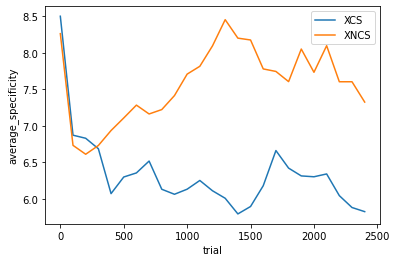

In [29]:
import pandas as pd
import numpy as np

ax = df[['average_specificity', "average_specificity_other"]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("average_specificity")
ax.legend(["XCS","XNCS"])



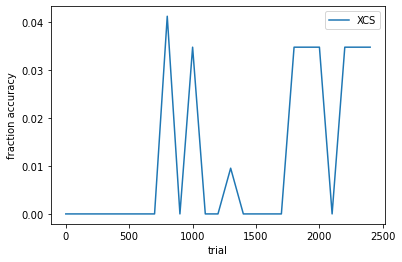

In [30]:
ax = df["fraction_accuracy_other"].plot()
ax.set_xlabel("trial")
ax.set_ylabel("fraction accuracy")
ax.legend(["XCS","XNCS"])

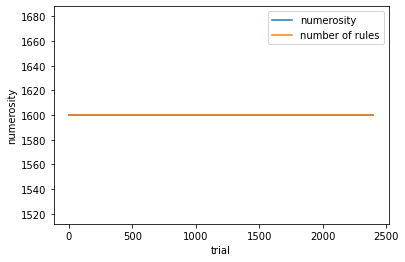

In [31]:
ax = df[['numerosity', 'numerosity_other']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("numerosity")
ax.legend(["numerosity", "number of rules"])

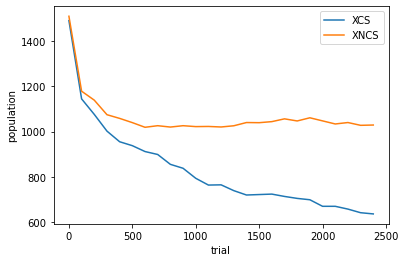

In [32]:
ax = df[['population', "population_other"]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["XCS","XNCS"])

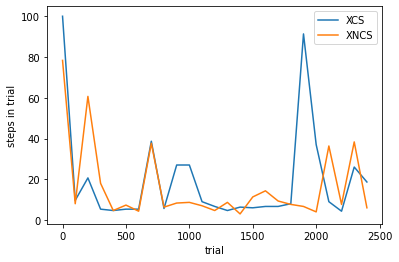

In [33]:
ax = df[['steps_in_trial', 'steps_in_trial_other']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps in trial")
ax.legend(["XCS","XNCS"])

In [34]:
print(sum(df["steps_in_trial"])/number_of_experiments)
print(sum(df["steps_in_trial_other"])/number_of_experiments)

163.22222222222226
135.77777777777777
